# ML Project
## Airbnb(New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)

- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 : 제곱해 평균)
- [데이터 출처 바로가기](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) / License CC0: Public Domain

### Baseline

In [63]:
# 라이브러리 
import pandas as pd

In [64]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### EDA

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [15]:
# 결측치(train)
# 12, 17, 7994, 7994
train.isna().mean()

id                                0.000000
name                              0.000307
host_id                           0.000000
host_name                         0.000435
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.204366
reviews_per_month                 0.204366
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [13]:
# 결측치(test) 
#2058
test.isna().mean()

id                                0.000000
name                              0.000409
host_id                           0.000000
host_name                         0.000409
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.210451
reviews_per_month                 0.210451
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

<AxesSubplot:>

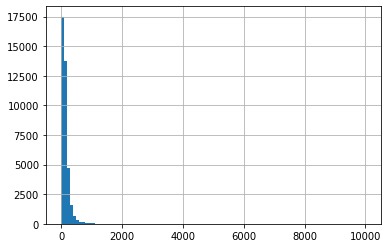

In [8]:
# target(hist)
train['price'].hist(bins=100)

In [9]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

### Data preprocessing

In [65]:
# 결측치 컬럼 삭제(last_review)
train.drop(columns=['last_review'], inplace=True)

In [27]:
# 결측치 채우기
indexs_to_drop = train[train['host_name'].isna() & train['name'].isna()].index

In [34]:
indexs_to_drop

Int64Index([], dtype='int64')

In [29]:
train.drop(indexs_to_drop, inplace=True)

In [33]:
train.isna().mean()

id                                0.000000
name                              0.000307
host_id                           0.000000
host_name                         0.000435
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [66]:
con1 = ((train['number_of_reviews']==0) & (train['reviews_per_month'].isna())).sum()
con2 = train['reviews_per_month'].isna().sum()

In [67]:
# 결측치 확인

if con1 == con2:
    train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
else:
    print("결측치가 다름")

In [68]:
train.isna().mean()

id                                0.000000
name                              0.000307
host_id                           0.000000
host_name                         0.000435
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
# 가격 값 복사


In [75]:
# 수치형 피처 선택
features = train.select_dtypes(include=['number']).columns
features = [ 'id', 'host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

### Train, Validation split
- Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [14]:
# 머신러닝 -> 교차검증(f1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, train, train['price'], scoring='f1', cv=5)

NameError: name 'vectors' is not defined

In [43]:
from sklearn.model_selection import train_test_split

X=train.drop('price', axis=1)
y=train['price']

# 검증 데이터 분리
def make_dataset():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()

### Machine Learning

In [16]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
round(mean_squared_error(y_test, pred),3)

54421.829

- train 1 : 54421.829


In [17]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge() # 기본 알파값이 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
round(mean_squared_error(y_test, pred),3)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.83285e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


54425.087

- train 1 : 54425.087


In [18]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
round(mean_squared_error(y_test, pred),3)

55149.055

- train 1 : 55149.055

In [19]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

alpha=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in alpha:
    model = ElasticNet(alpha=i, l1_ratio=0.6) # defalut=0.5(반반)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"when alpha = {i} : mse = {round(mean_squared_error(y_test, pred),3)}")

when alpha = 0.0001 : mse = 54426.003
when alpha = 0.001 : mse = 54491.461
when alpha = 0.01 : mse = 55160.319
when alpha = 0.1 : mse = 55848.662
when alpha = 0.2 : mse = 55915.16
when alpha = 0.3 : mse = 55939.031
when alpha = 0.4 : mse = 55951.671
when alpha = 0.5 : mse = 55959.722
when alpha = 0.6 : mse = 55965.449
when alpha = 0.7 : mse = 55969.834
when alpha = 0.8 : mse = 55973.316
when alpha = 0.9 : mse = 55976.168


- train 1 : 55976.168

In [20]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
round(mean_squared_error(y_test, pred),3)

47489.829

- train 1 : 47489.829

In [21]:
# Xgboost
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)
round(mean_squared_error(y_test, pred),3)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


50502.806

- train 1 : 50502.806

In [24]:
y_test.shape, test.shape, train.shape

((9779, 1), (9779, 15), (39116, 10))

In [29]:
test1 = test.select_dtypes(include=['number'])

### Evaluation

In [54]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

In [39]:
# Xgboost
pred = model.predict(test1)
round(mean_squared_error(y_test, pred),3)

49318.063

In [38]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요! 
print(f"나의 점수는 {try1} 입니다.")

나의 점수는 49318.063 입니다.


1. 나의 점수는 49318.063 입니다.

### 성능 향상

In [45]:
# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

In [ ]:
# 최적의 하이퍼파라미터 찾기
grid.best_params_

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3, 
    n_estimators = 100, 
    subsample = 0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

65417.68663144974

In [47]:
from sklearn.model_selection import b

xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint

param_dist = {
 'max_depth': randint(3, 10), # 정수 범위 지정
 'min_child_weight': randint(1, 6) # 정수 범위 지정
}

# XGBRegressor 인스턴스 생성
xgb = XGBRegressor(learning_rate=0.1, n_estimators=1000, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=2019)

# RandomizedSearchCV 인스턴스 생성
rsearch = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=10, random_state=2019)

# 학습 데이터에 맞춰 랜덤 서치 수행
rsearch.fit(X, y)

# 결과 출력
print(rsearch.cv_results_)
print(rsearch.best_params_)
print(rsearch.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


[CV 1/5; 1/100] START max_depth=3, min_child_weight=3...........................
[CV 1/5; 1/100] END max_depth=3, min_child_weight=3;, score=-50178.355 total time= 3.0min
[CV 3/5; 1/100] START max_depth=3, min_child_weight=3...........................
[CV 3/5; 1/100] END max_depth=3, min_child_weight=3;, score=-58555.233 total time= 3.0min
[CV 5/5; 1/100] START max_depth=3, min_child_weight=3...........................
[CV 5/5; 1/100] END max_depth=3, min_child_weight=3;, score=-46353.434 total time= 2.9min
[CV 2/5; 2/100] START max_depth=8, min_child_weight=1...........................
[CV 2/5; 2/100] END max_depth=8, min_child_weight=1;, score=-47580.020 total time= 6.0min
[CV 4/5; 2/100] START max_depth=8, min_child_weight=1...........................
[CV 4/5; 2/100] END max_depth=8, min_child_weight=1;, score=-62188.888 total time= 6.9min
[CV 1/5; 3/100] START max_depth=9, min_child_weight=1...........................
[CV 1/5; 3/100] END max_depth=9, min_child_weight=1;, score=-459

[CV 5/5; 3/100] END max_depth=9, min_child_weight=1;, score=-44072.814 total time= 9.2min
[CV 5/5; 12/100] END max_depth=4, min_child_weight=5;, score=-45993.274 total time= 2.0min
[CV 5/5; 14/100] END max_depth=6, min_child_weight=3;, score=-44421.741 total time= 4.6min
[CV 5/5; 8/100] END max_depth=7, min_child_weight=1;, score=-45066.205 total time= 5.6min
[CV 2/5; 12/100] END max_depth=4, min_child_weight=5;, score=-45774.476 total time= 2.6min
[CV 5/5; 13/100] END max_depth=5, min_child_weight=1;, score=-44255.852 total time= 2.6min


In [48]:
# 최적의 하이퍼파라미터 찾기
grid.best_params_

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05}

- base 49318.063

- {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05}
: 48632.573


In [49]:
# 찾은 최적의 하이퍼파라미터로 모델을 돌려 mse를 측정하세요.
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 7,
    n_estimators = 100,
    subsample = 0.8
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

62766.41328960267

In [80]:
X.shape, y.shape

((39116, 9), (39116,))

In [81]:
test1.shape, y_test.shape

((9779, 9), (9779, 1))

In [56]:
# Xgboost
pred = xgb.predict(test1)
round(mean_squared_error(y_test, pred),3)

48632.573

In [57]:
test1.shape, y_test.shape

((9779, 9), (9779, 1))

### scaler

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [78]:
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBRegressor

# X = train.drop('price', axis=1)  # 타겟 변수를 제외한 나머지 피처들
# y = train['price']  # 타겟 변수

model = XGBRegressor(random_state=2022)
scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)

RMSE scores: [224.68640919 227.34489818 244.39407515 258.481559   218.18652321]


### 데이터

In [ ]:
train

In [64]:
test1

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,33771081,40.70959,-73.94652,3,2,0.31,1,0
1,971247,5308961,40.79368,-73.96487,3,159,2.09,1,244
2,414801,319077,40.68722,-73.96289,1,54,0.65,4,365
3,21815842,1931990,40.68859,-73.96035,3,2,0.13,1,0
4,13576581,78325795,40.80573,-73.94994,1,160,4.31,3,246
...,...,...,...,...,...,...,...,...,...
9774,16024539,1622733,40.72413,-73.95090,2,14,0.70,1,93
9775,35235326,96659533,40.69447,-73.91364,2,5,4.17,2,301
9776,33471805,252191305,40.69090,-73.73193,1,34,11.21,1,61
9777,28534405,2891643,40.82146,-73.94598,1,0,NaN,1,0


In [50]:
y_test

,price
0,80
1,190
2,500
3,93
4,129
...,...
9774,75
9775,70
9776,50
9777,50
